# **Model Machine Learning Klasfikasi dan Rekomendasi Musik**
_Oleh :_
1. *M299R5310 - Muhammad Aldi Surya Putra*
2. *M014V6060 - Ayu Kadek Nadya Oktaviana*

## **1. Import Library**

In [1]:
!pip install opendatasets

In [2]:
# Usual Library
import pandas as pd
import numpy as np
import sklearn
import os
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

# Download Dataset
import opendatasets as od 

# Audio Library
import librosa

# Classification Library
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

## **2. Download Dataset**

In [3]:
# Download Dataset from Kaggle
od.download("https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification")

100%|██████████| 1.21G/1.21G [00:06<00:00, 194MB/s]


## **3. Dataset**

In [4]:
# Read Dataset
audio_data = '/content/gtzan-dataset-music-genre-classification/Data/genres_original'
print('Genre :')
print(list(os.listdir(audio_data)))
print('\n')

metadata = pd.read_csv('/content/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv')
metadata.head()

Genre :
['blues', 'jazz', 'country', 'rock', 'reggae', 'metal', 'disco', 'classical', 'pop', 'hiphop']




,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


## **4. Ekstraksi Fitur MFCC (Mel Frequency Cepstral Coefficients)**

In [5]:
def features(data):
  audio, sample_rate = librosa.load(data_name, res_type="kaiser_fast")
  mfccs_features = librosa.feature.mfcc(y = audio, sr=22050 , n_mfcc = 40) #36565
  mfccs_var = np.var(mfccs_features.T, axis=0)
  mfccs_mean = np.mean(mfccs_features.T, axis=0)
  mfcc = mfccs_var+mfccs_mean
  
  return mfcc

In [6]:
# Ekstraksi fitur MFCC untuk seluruh data audio

extracted_features=[]
for index_num, row in tqdm(metadata.iterrows()):
    try:
        final_class_labels = row["label"]
        data_name = os.path.join(os.path.abspath(audio_data), final_class_labels+'/', str(row["filename"]))    
        data = features(data_name)
        extracted_features.append([data, final_class_labels])
    except Exception as e:
        print(f"Error: {e}")
        continue

556it [00:50,  3.93it/s]

Error: 


1000it [01:30, 11.09it/s]


In [7]:
# Print hasil ekstraksi fitur
df = pd.DataFrame(extracted_features, columns=['feature','class'])
df.head()

,feature,class
0,"[2450.637, 417.4856, 216.4063, 193.47333, 161....",blues
1,"[7557.0537, 684.25116, 581.76605, 300.3838, 28...",blues
2,"[3228.3223, 649.21136, 382.6873, 175.77469, 14...",blues
3,"[5307.9727, 606.5962, 262.82385, 185.1264, 269...",blues
4,"[5034.9546, 980.0044, 298.20514, 215.60419, 30...",blues


In [8]:
# Hitung jumlah data per kelas
df['class'].value_counts()

blues        100
classical    100
reggae       100
pop          100
metal        100
rock         100
disco        100
hiphop       100
country      100
jazz          99
Name: class, dtype: int64

In [9]:
# Independent Dataset
# Ubah data dari list menjadi array

X = np.array(df['feature'].tolist())
y = np.array(df['class'].tolist())

In [10]:
print('X shape\t:', X.shape)
print('y shape\t:', y.shape)

X shape	: (999, 40)
y shape	: (999,)


## **5. Klasifikasi Genre**

### **5.1 Data Preparation**

#### **1. Encoding Label Genre**

In [11]:
# Melakukan pengkodean label dengan LabelEncoder()
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [12]:
print('y shape after encode label :', y.shape)

y shape after encode label : (999, 10)


#### **2. Splitting Data Train dan Test**

In [13]:
# Split train dan test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [14]:
print(f"X_train\t{X_train.shape}")
print(f"X_test\t{X_test.shape}")
print(f"y_train\t{y_train.shape}")
print(f"y_test\t{y_test.shape}")

X_train	(669, 40)
X_test	(330, 40)
y_train	(669, 10)
y_test	(330, 10)


### **5.2 Modeling Using Deep Learning**

In [31]:
# Model Build Deep Learning
model=Sequential()
model.add(Dense(1024, input_shape=(40,), activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))

# Final Layer
model.add(Dense(10, activation='softmax'))  

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              41984     
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [32]:
# Compile Model
model.compile(optimizer = "adam",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [33]:
# Fit Model
history = model.fit(X_train, y_train,
                 validation_data = (X_test, y_test),
                 epochs = 600,
                 batch_size = 64,
                 callbacks = Callback())

Epoch 1/600
11/11 [==============================] - 1s 27ms/step - loss: 128.5224 - accuracy: 0.1091 - val_loss: 31.8621 - val_accuracy: 0.1061
Epoch 2/600
11/11 [==============================] - 0s 10ms/step - loss: 57.3181 - accuracy: 0.1196 - val_loss: 13.9244 - val_accuracy: 0.1697
Epoch 3/600
11/11 [==============================] - 0s 11ms/step - loss: 29.2648 - accuracy: 0.0957 - val_loss: 5.1523 - val_accuracy: 0.1030
Epoch 4/600
11/11 [==============================] - 0s 9ms/step - loss: 18.6615 - accuracy: 0.1061 - val_loss: 3.2333 - val_accuracy: 0.1485
Epoch 5/600
11/11 [==============================] - 0s 10ms/step - loss: 11.6694 - accuracy: 0.1405 - val_loss: 2.2583 - val_accuracy: 0.1909
Epoch 6/600
11/11 [==============================] - 0s 9ms/step - loss: 10.0013 - accuracy: 0.1330 - val_loss: 2.4596 - val_accuracy: 0.1667
Epoch 7/600
11/11 [==============================] - 0s 9ms/step - loss: 7.9074 - accuracy: 0.1330 - val_loss: 2.3948 - val_accuracy: 0.1273


Max. Validation Accuracy 0.5515151619911194


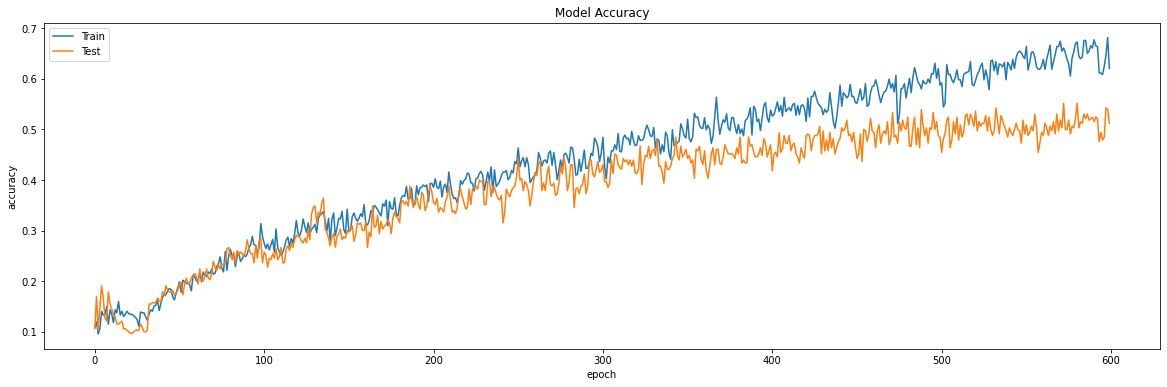

In [34]:
print("Max. Validation Accuracy", max(history.history["val_accuracy"]))

# Plot Akurasi
plt.figure(figsize=(20,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('plot_akurasi.png')
plt.show()

### **5.3 Model Evaluation**

In [35]:
# Model evaluasi
test_loss, test_acc  = model.evaluate(X_test, y_test, batch_size=128)
print("Loss Test\t:", test_loss)
print("Accuracy Test\t:", test_acc*100)

3/3 [==============================] - 0s 7ms/step - loss: 1.5458 - accuracy: 0.5121
Loss Test	: 1.5458093881607056
Accuracy Test	: 51.212120056152344


### **5.4 Testing Model**

In [36]:
# Model Predict
predictions = np.argmax(model.predict(X_test), axis=-1)
predictions

array([7, 0, 4, 6, 8, 5, 3, 8, 0, 9, 6, 2, 4, 8, 9, 9, 9, 3, 3, 8, 9, 4,
       0, 9, 1, 0, 0, 2, 7, 9, 6, 6, 3, 3, 4, 7, 3, 9, 9, 9, 9, 1, 6, 0,
       2, 8, 0, 3, 8, 8, 3, 6, 4, 2, 8, 9, 7, 7, 4, 5, 4, 6, 1, 3, 7, 8,
       5, 4, 3, 3, 1, 3, 7, 7, 7, 6, 6, 7, 6, 2, 6, 2, 6, 2, 8, 3, 5, 3,
       9, 7, 7, 8, 8, 1, 0, 8, 0, 8, 5, 9, 1, 5, 6, 6, 7, 0, 1, 2, 5, 4,
       2, 5, 7, 8, 9, 8, 9, 3, 3, 1, 3, 4, 8, 6, 8, 3, 8, 3, 6, 4, 7, 8,
       7, 6, 3, 9, 3, 1, 7, 2, 7, 4, 6, 3, 4, 3, 0, 2, 2, 5, 3, 9, 7, 8,
       8, 8, 8, 8, 8, 4, 9, 5, 1, 7, 3, 1, 8, 7, 1, 8, 5, 8, 4, 3, 7, 1,
       7, 8, 0, 3, 9, 6, 8, 3, 3, 3, 3, 7, 8, 8, 8, 6, 7, 8, 6, 1, 9, 3,
       8, 8, 6, 7, 8, 3, 6, 8, 1, 6, 0, 3, 8, 3, 1, 0, 0, 9, 4, 2, 6, 6,
       8, 6, 9, 0, 7, 5, 1, 8, 7, 0, 0, 6, 0, 1, 9, 7, 4, 9, 9, 6, 4, 9,
       4, 4, 9, 8, 9, 4, 3, 3, 8, 9, 7, 8, 8, 8, 0, 3, 7, 3, 1, 7, 1, 9,
       4, 4, 3, 4, 3, 3, 1, 9, 7, 3, 5, 5, 1, 6, 4, 7, 3, 7, 0, 5, 9, 0,
       4, 6, 8, 7, 9, 9, 1, 1, 0, 6, 8, 1, 3, 5, 7,

In [37]:
# Input path audio yang akan di test
filename = "/content/audios_metal_music.mp3"

# Librosa load
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 

# MFCC Fitur Inputan Audio
mfccs_features = librosa.feature.mfcc(y = audio, sr = 22050, n_mfcc = 40)
mfccs_mean = np.mean(mfccs_features.T, axis=0)
mfccs_var = np.var(mfccs_features.T, axis=0)
mfccs_scaled_features = mfccs_mean+mfccs_var

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print('\n', mfccs_scaled_features)
print('\n', mfccs_scaled_features.shape)

predicted = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted, axis=1)
print("Label Genre\t:", predicted_label)

prediction_class = labelencoder.inverse_transform(predicted_label) 
print("Prediksi Genre\t:", prediction_class)

[1311.153      366.77823    120.74991    161.5347      41.143936
   59.67577     31.017849    60.31092     30.855206    49.11696
   21.915636    52.960773    20.216454    30.172724    13.740365
   28.748981     9.442816    21.808418    16.686659    20.7088
    8.870943    21.222208    11.57555     18.642704    12.713156
   16.469267    10.439312    18.459776     7.3774996   12.005984
   14.014056    12.91427     13.568093    17.611189    12.259672
   14.613031    10.525909    10.751529    11.547751    13.413638 ]

 [[1311.153      366.77823    120.74991    161.5347      41.143936
    59.67577     31.017849    60.31092     30.855206    49.11696
    21.915636    52.960773    20.216454    30.172724    13.740365
    28.748981     9.442816    21.808418    16.686659    20.7088
     8.870943    21.222208    11.57555     18.642704    12.713156
    16.469267    10.439312    18.459776     7.3774996   12.005984
    14.014056    12.91427     13.568093    17.611189    12.259672
    14.613031    10.

## **6. Save Model**

In [38]:
# Save Model
model.save('model.h5')